In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import networkx as nx
import matplotlib.pyplot as plt

data_dir = '/shared/editter/'

start_df = pd.read_csv(data_dir + 'log2FoldChangeData.csv', index_col=0)
#start_df.head()

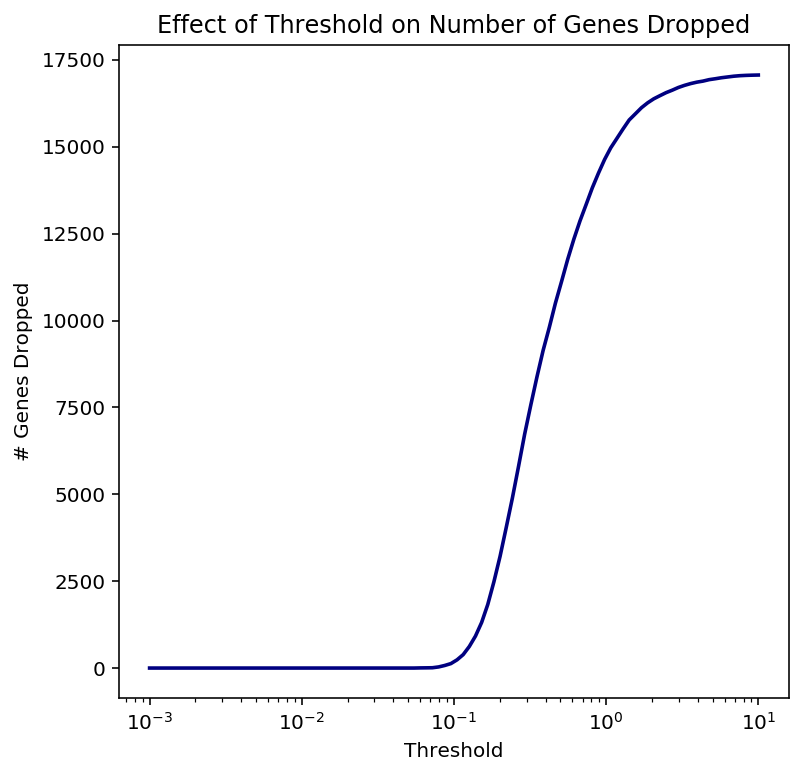

In [221]:
threshold_arr = np.geomspace(0.001, 10.0, 100)
lengths = []
for threshold in threshold_arr:
    columns = column_filter(start_df, threshold)
    lengths.append(len(columns))
#print(lengths)

plt.figure(figsize=(6, 6))
plt.semilogx(threshold_arr, lengths, c='navy', lw=1.8)
plt.xlabel('Threshold')
plt.ylabel('# Genes Dropped')
plt.title('Effect of Threshold on Number of Genes Dropped')
plt.show()

Text(0.5, 1.0, 'Effect of Threshold on Number of Genes Dropped')

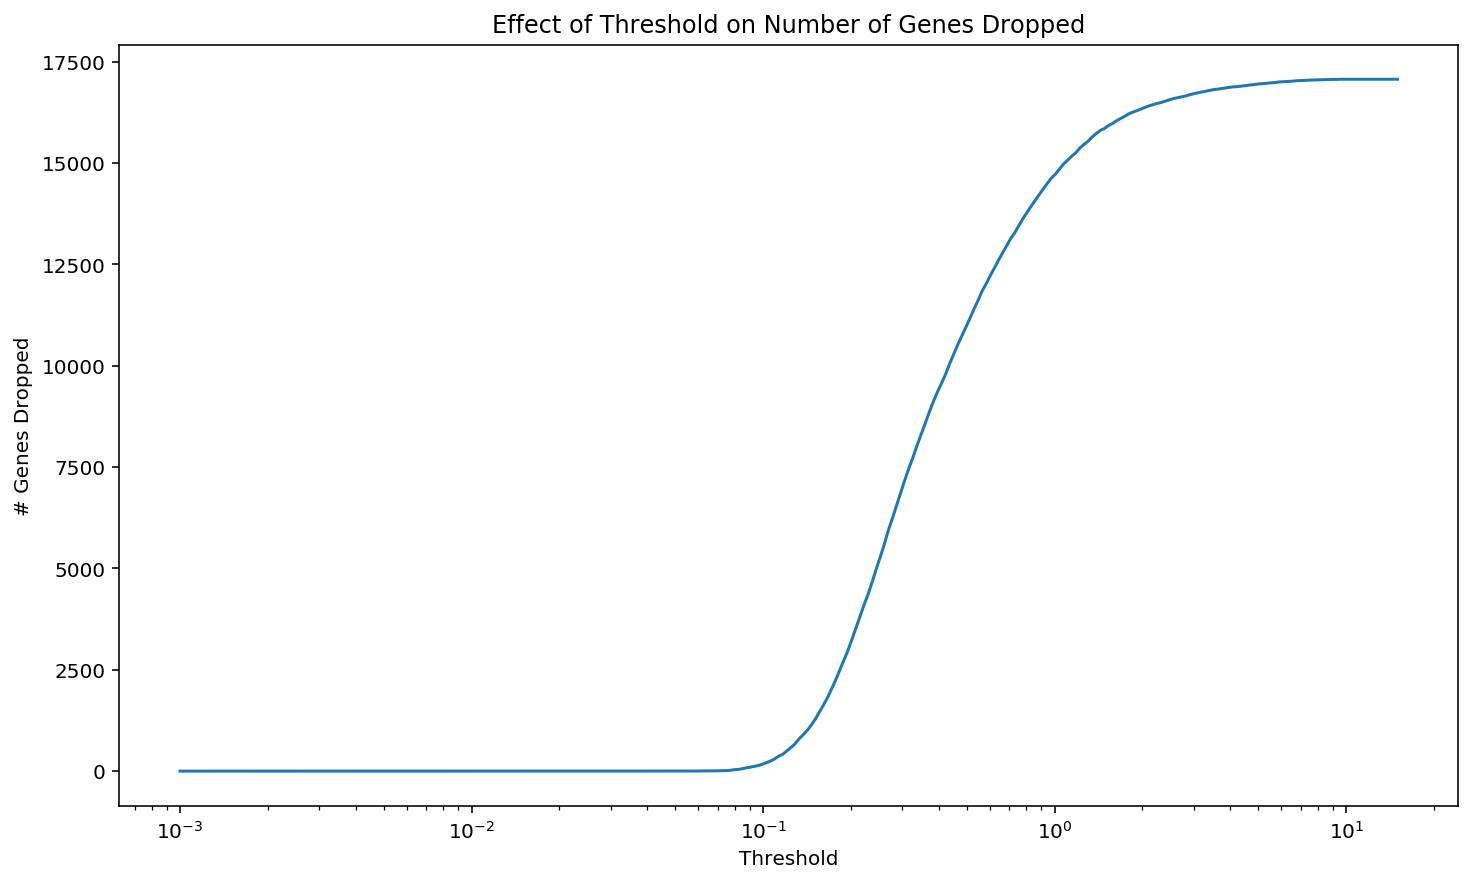

In [101]:
## ED
def mostDE_genes_for_thresh(df, thresh):
    threshold_arr = np.geomspace(0.001, 15.0, 300)
    lengths = [len(column_filter(df, thresh)) for thresh in threshold_arr]
    return lengths

plt.semilogx(threshold_arr, lengths)
plt.xlabel('Threshold')
plt.ylabel('# Genes Dropped')
plt.title('Effect of Threshold on Number of Genes Dropped')

In [250]:
selec_genes_2 = select_thresh_forGeneNum(30, start_df)

In [230]:
input_df.index

Index(['GRHL2', 'NR2F2', 'TRIM33', 'SUMO3', 'NRIP1', 'ESRRA', 'TRIM24',
       'ZMIZ1', 'SUMO2', 'NCOA3', 'GATA3', 'TRIM28', 'CREBBP', 'TFAP2C',
       'DPF2', 'EP300', 'RARA', 'FOXA1', 'SUMO1'],
      dtype='object')

In [251]:
input_df = start_df[selec_genes_2]
#create_ko_graph(input_df)
input_df.head(20)

,ASCL1,XIST,CA2,TMEM150C,CYBA,TSPYL5,SGCG,HENMT1,SHH,EN2,...,CDCA7,LXN,FNDC10,PCSK1N,CAV2,RAMP3,FZD6,LPIN2,MAP7D3,PKIA
GRHL2,0.464200,-0.451377,0.383266,-0.322853,0.289762,-0.350252,-0.249575,-0.325612,0.254706,0.223797,...,0.085482,-0.073374,-0.067963,-0.052600,-0.053213,-0.041226,-0.030235,-0.033118,-0.026842,0.013223
NR2F2,-0.175376,-0.362725,0.626933,-0.073779,0.152249,0.259843,0.005369,-0.376324,0.090955,-0.192883,...,0.084627,0.569617,0.147731,0.499711,0.406473,-0.611516,-0.121149,0.301363,0.202493,-0.368347
TRIM33,1.439895,-0.732802,4.144967,3.160044,3.153511,4.348083,1.918027,4.301394,3.231336,2.163865,...,2.438853,3.187588,3.904202,3.089879,3.584401,4.101829,2.742614,3.441910,2.208305,2.547790
SUMO3,-0.129232,-0.448292,0.421740,-0.141970,0.030191,-0.296909,0.053033,-0.349432,0.073970,0.148878,...,0.233940,-0.007728,0.080501,0.036034,-0.314955,-0.112911,-0.174261,-0.099039,0.068517,0.130263
NRIP1,2.187913,-0.561220,0.620166,-0.644441,0.264985,-0.458616,-1.196399,-0.373591,0.056776,0.297417,...,0.270249,0.151081,-0.081380,-0.286649,-0.709274,-0.181626,-0.282991,-0.206022,0.086141,-0.217304
ESRRA,-0.113742,-0.579763,0.253088,-0.532431,-0.101875,-0.447010,-0.320754,-0.548110,-0.103467,0.335147,...,0.083527,0.208228,-0.099077,0.224111,-0.881815,-0.636499,-0.377554,-0.195013,-0.077069,-0.218559
TRIM24,1.580539,1.237079,3.253074,2.878694,2.964355,4.162639,2.092313,4.138476,2.593631,1.945073,...,3.417528,3.554071,3.329911,2.800955,3.238643,2.525564,2.661490,3.235934,2.535417,2.799947
ZMIZ1,0.518483,-0.340348,0.135622,-0.512165,-0.162582,-0.399048,-0.947915,-0.549138,-0.186325,0.395156,...,0.162197,0.133170,-0.226014,-0.306469,-0.550241,-0.157264,-0.166173,-0.013385,0.037217,0.086554
SUMO2,7.027132,8.274140,9.341061,7.278988,8.097225,9.308388,7.557830,9.429080,8.275749,7.248889,...,7.986982,8.590633,8.597057,7.253216,7.253876,8.050280,7.640441,8.536976,7.409017,7.705688
NCOA3,0.072593,6.124716,1.363580,1.797305,3.504598,3.972185,1.742345,3.273974,6.004102,1.946079,...,2.121251,3.188250,2.255958,3.054862,3.255517,2.120475,3.182359,3.753253,2.217566,3.052292


In [88]:
filtered_df = start_df.drop(column_filter(start_df, 1.0), axis=1)

In [246]:
knock_df

,GRHL2,NR2F2,TRIM33,SUMO3,NRIP1,ESRRA,TRIM24,ZMIZ1,SUMO2,NCOA3,GATA3,TRIM28,CREBBP,TFAP2C,DPF2,EP300,RARA,FOXA1,SUMO1
GRHL2,0.125727,0.000294,0.030760,0.083746,0.004693,0.017512,0.114325,0.026509,0.005332,0.005645,0.003309,0.084032,0.044573,0.064549,0.047089,0.083845,0.120853,0.047292,0.019282
NR2F2,0.023730,1.081044,0.074811,0.010345,0.126434,0.114698,0.001187,0.114172,0.002350,0.095273,0.153740,0.073218,0.059693,0.014303,0.060397,0.082160,0.164053,0.079257,0.066549
TRIM33,0.180426,0.008857,1.212030,0.126979,0.116356,0.169676,0.201465,0.163450,0.024932,0.051648,0.106974,0.082083,0.177147,0.065122,0.018442,0.183697,0.133375,0.086105,0.082138
SUMO3,0.084112,0.019734,0.019510,1.709428,0.045752,0.076390,0.102631,0.007961,0.050279,0.056052,0.102890,0.169534,0.047495,0.006295,0.035383,0.008510,0.052052,0.014825,0.089934
NRIP1,0.059646,0.018429,0.024980,0.010108,0.679071,0.388829,0.020059,0.312787,0.015574,0.140999,0.207075,0.158679,0.144507,0.249713,0.039728,0.164802,0.136259,0.013625,0.089346
ESRRA,0.086262,0.006509,0.015877,0.131239,0.094505,0.410317,0.054205,0.077808,0.081991,0.078952,0.219875,0.053870,0.223380,0.063492,0.020499,0.184715,0.187887,0.031192,0.117778
TRIM24,0.020713,0.046420,0.088199,0.147429,0.059007,0.005266,1.629492,0.090179,0.113829,0.095857,0.011037,0.146641,0.077184,0.005394,0.057985,0.052146,0.048180,0.012732,0.113020
ZMIZ1,0.075616,0.087984,0.097477,0.037388,0.159049,0.082512,0.190819,0.412437,0.084009,0.135890,0.247574,0.135299,0.026192,0.103448,0.061122,0.099806,0.055351,0.047385,0.039585
SUMO2,0.159992,0.591601,0.781514,0.570195,0.526322,0.070904,0.658708,0.187425,1.594884,1.356305,0.172805,0.399899,0.079007,0.454142,0.088875,0.046712,0.094558,0.102058,0.252665
NCOA3,0.137569,0.265334,0.078390,0.097362,0.431215,0.259374,0.261760,0.076196,0.007281,1.384758,0.010978,0.061770,0.072616,0.236183,0.008079,0.003661,0.026636,0.063123,0.035981


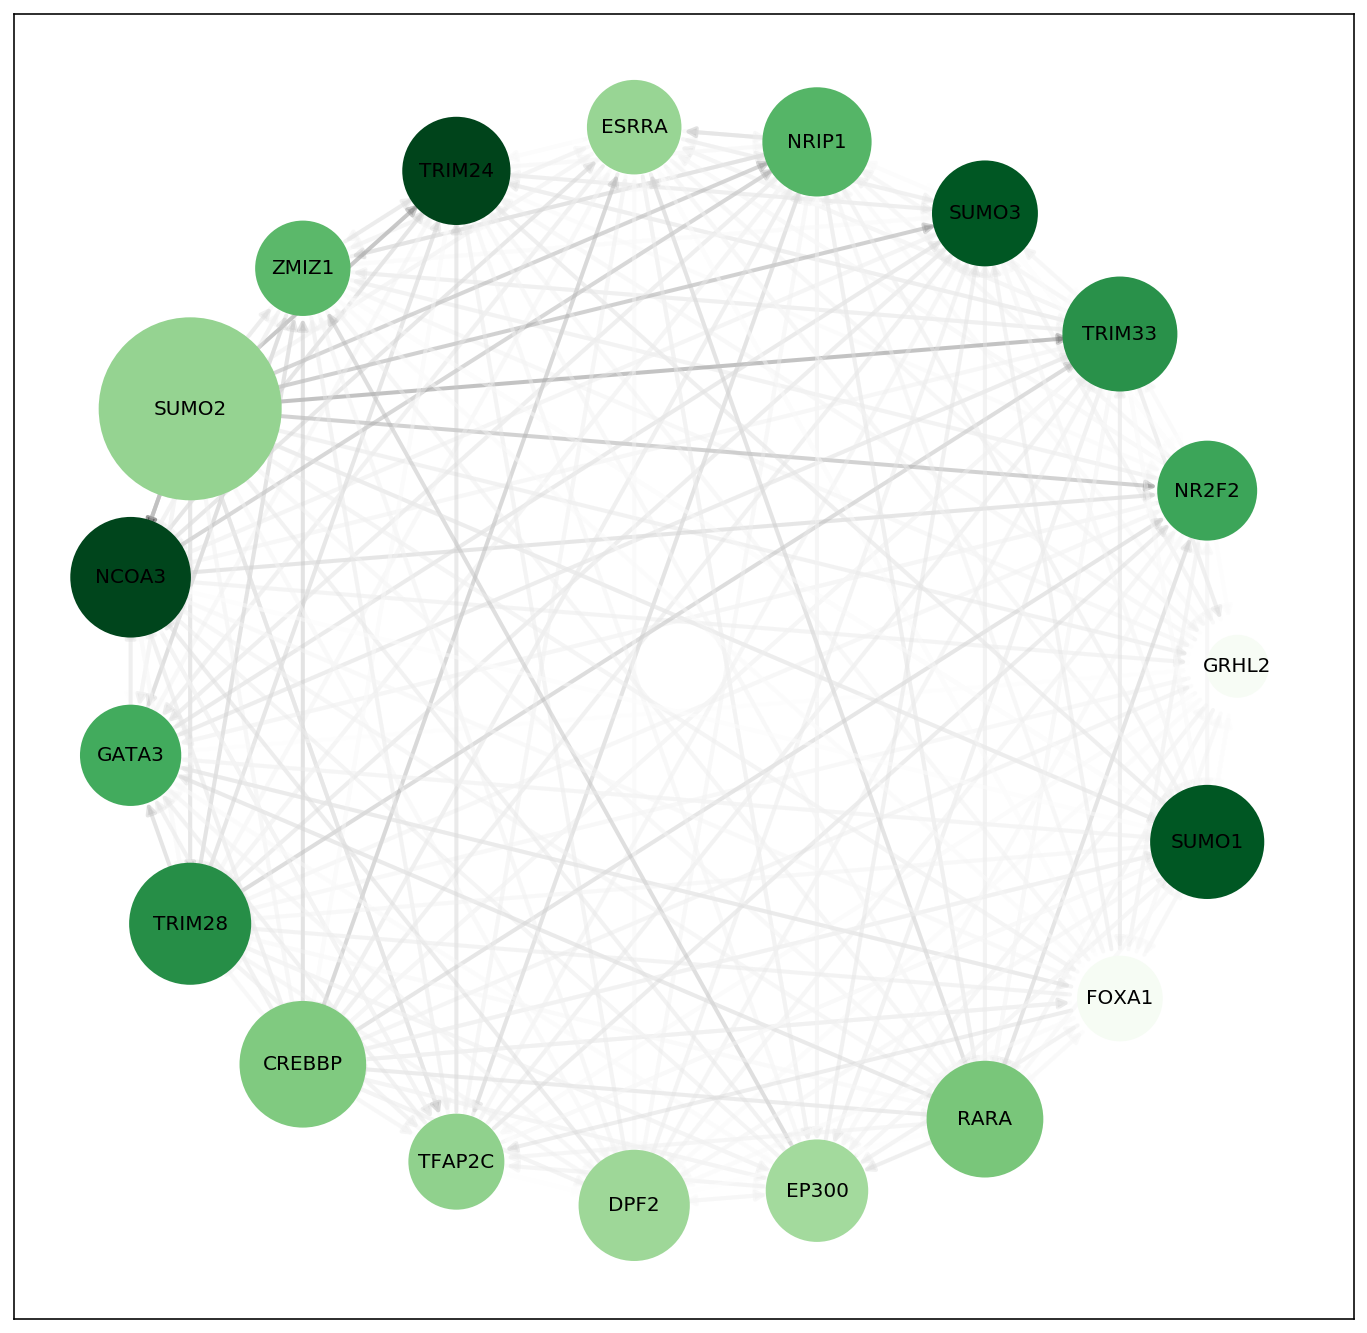

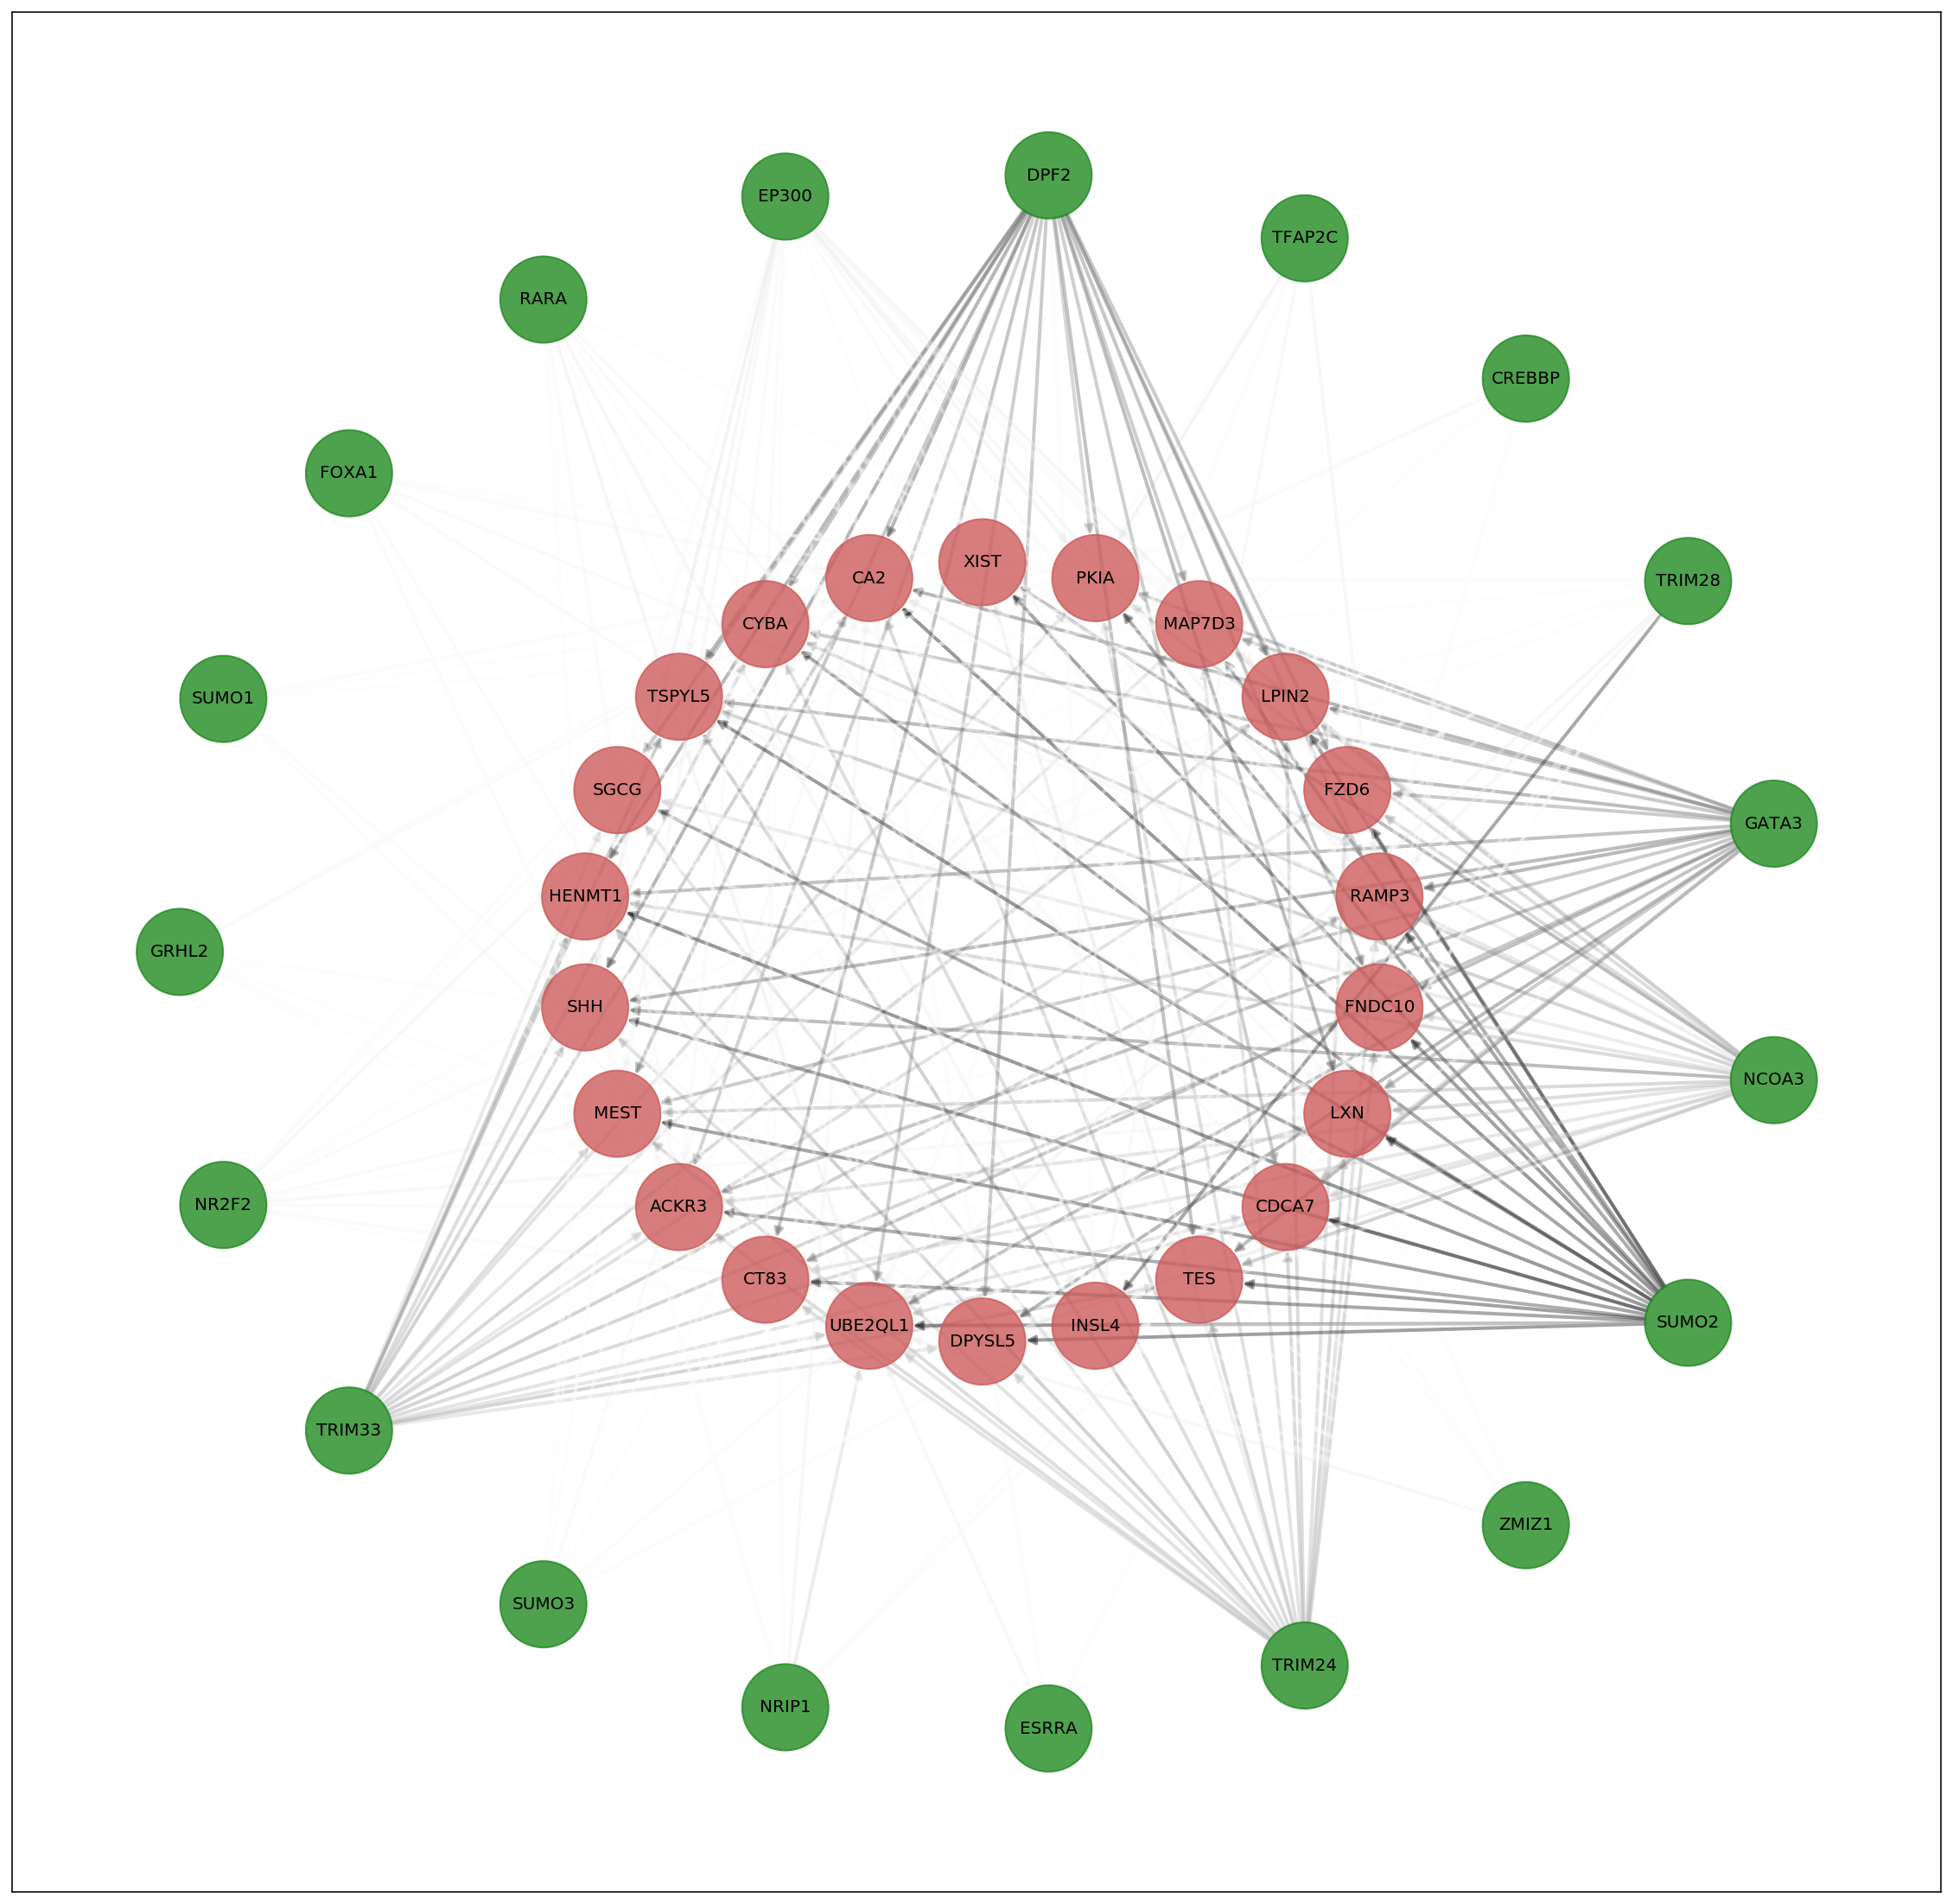

In [314]:
def knock_out_df(input_df):
    return input_df[input_df.index]


def create_ko_graph(input_df):
    # selects knockout genes from dataframe, get 20x20df
    knock_df = np.abs(knock_out_df(input_df))
    # reate directional graph (with arrows on edge lines)
    G = nx.DiGraph()
    # nodes labeled by integers. will become object to refer to later
    G.add_nodes_from(np.arange(0, len(knock_df.columns), 1))
    
    #labels=gene name
    labels = {}
    #colour of node
    node_colors = []
    #colour of edge line, high = dark
    colors = []
    sizes = []
    
    # Assign labels (gene names) to node (through dictionary)
    for idx, node in enumerate(G.nodes()):
        labels[node] = knock_df.columns.values[idx]
    # Finding size of Node (bigger if more DE genes, sum across row)
    # square matrix, use i as row and column
    for i in range(0, len(knock_df.columns)):
        sizes.append(1000 * np.sum(knock_df.iloc[i, :]))
        # Node colour is sum of columns
        node_colors.append(np.sum(knock_df.iloc[:, i]))
        #looping over columns
        for j in range(0, len(knock_df.columns)):
            # ifnot diagonal element
            if i != j:
                G.add_edge(i, j)
                # colour of line is abs value of DE
                colors.append(knock_df.iloc[i, j])
    return G, labels, colors, sizes, node_colors
# #Plotting
# G, labels, colors, sizes, node_colors = create_ko_graph(start_df)
# plt.figure(figsize=(12, 12))
# # have to give for input later, position of nodes
# pos = nx.circular_layout(G)

# nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Greens, node_size=sizes, alpha=1.0)
# nx.draw_networkx_edges(G, pos, edge_color=colors, edge_cmap=plt.cm.binary, edge_vmin=0.0, width=2.0, arrowstyle='-|>', alpha=0.4, min_source_margin=25, min_target_margin=25)
# nx.draw_networkx_labels(G, pos, labels, font_size=10)
# plt.show()

def full_graph(input_df, num):
    knock_df = np.abs(knock_out_df(input_df))
    G = nx.DiGraph()
    # add nodes from knockout genes
    G.add_nodes_from(np.arange(0, len(knock_df.columns), 1))
    # Add extra genes from select_thresh_forGeneNum
    columns = select_thresh_forGeneNum(num, input_df)
    add_df = input_df[columns]
    # add these as other nodes
    G.add_nodes_from(np.arange(len(knock_df.columns), len(add_df.index) + len(add_df.columns), 1))
    
    labels = {}
    node_colors = []
    colors = []
    sizes = []
    for idx, node in enumerate(G.nodes()):
        # for knockout genes
        if idx < len(knock_df.columns):
            labels[node] = knock_df.columns.values[idx]
        # for added genes
        else:
            labels[node] = add_df.columns.values[idx - len(knock_df.columns)]
    # For knockout genes        
    for i in range(0, len(knock_df.columns)):
        sizes.append(2500)
        # node_colors.append(np.sum(knock_df.iloc[:, i]))
        node_colors.append('forestgreen')
        # add edges between knockout genes (currently removed for clarity)
        for j in range(0, len(knock_df.columns)):
            if i != j:
                continue
                #G.add_edge(i, j)
                #colors.append(knock_df.iloc[i, j])
    # i knockout genes, j is columns            
    for i in range(0, len(knock_df.columns)):
        for j in range(len(knock_df.columns), len(knock_df.columns) + len(add_df.columns)):
            G.add_edge(i, j)
            colors.append(add_df.iloc[i, j - len(knock_df.columns)])
    for i in range(0, len(add_df.columns)):
        node_colors.append('indianred')
        sizes.append(2500)
    return G, labels, colors, sizes, node_colors

def get_shells(input_df, num):
    columns = select_thresh_forGeneNum(num, input_df)
    shells = [list(range(len(input_df.index), len(input_df.index) + len(columns), 1)), list(range(0, len(input_df.index), 1))]
    return shells

def plot_ko_graph(input_df):
    G, labels, colors, sizes, node_colors = create_ko_graph(start_df)
    plt.figure(figsize=(12, 12))
    # have to give for input later, position of nodes
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Greens, node_size=sizes, alpha=1.0)
    nx.draw_networkx_edges(G, pos, edge_color=colors, edge_cmap=plt.cm.binary, edge_vmin=0.0, width=2.0, arrowstyle='-|>', alpha=0.4, min_source_margin=25, min_target_margin=25)
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    plt.savefig('/shared/ko_graph.pdf')
    
def plot_shell_graph(input_df, num):
    G, labels, colors, sizes, node_colors = full_graph(start_df, num)
    plt.figure(figsize=(20, 20))
    shells = get_shells(start_df, num)
    pos = nx.shell_layout(G, shells)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=sizes, alpha=0.8)
    nx.draw_networkx_edges(G, pos, edge_color=colors, edge_cmap=plt.cm.binary, edge_vmin=0.0, width=2.0, arrowstyle='-|>', alpha=0.4, min_source_margin=25, min_target_margin=25)
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    plt.savefig('/shared/shell_graph_{}.pdf'.format(num))

plot_ko_graph(start_df)
plot_shell_graph(start_df, 22)
# # Plotting
# G, labels, colors, sizes, node_colors = full_graph(start_df, 20)
# plt.figure(figsize=(20, 20))
# # Define shells (concentric circles)
# shells = [[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]
# #position the nodes in the graph
# pos = nx.shell_layout(G, shells)
# nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=sizes, alpha=0.8)
# nx.draw_networkx_edges(G, pos, edge_color=colors, edge_cmap=plt.cm.binary, edge_vmin=0.0, width=2.0, arrowstyle='-|>', alpha=0.4, min_source_margin=25, min_target_margin=25)
# nx.draw_networkx_labels(G, pos, labels, font_size=10)
# plt.show()

In [316]:
# Function repository

%%writefile '/shared/editter/FunctionRepo_20200918.py'


def create_ko_graph(input_df):
    # selects knockout genes from dataframe, get 20x20df
    knock_df = np.abs(knock_out_df(input_df))
    # reate directional graph (with arrows on edge lines)
    G = nx.DiGraph()
    # nodes labeled by integers. will become object to refer to later
    G.add_nodes_from(np.arange(0, len(knock_df.columns), 1))
    
    #labels=gene name
    labels = {}
    #colour of node
    node_colors = []
    #colour of edge line, high = dark
    colors = []
    sizes = []
    
    # Assign labels (gene names) to node (through dictionary)
    for idx, node in enumerate(G.nodes()):
        labels[node] = knock_df.columns.values[idx]
    # Finding size of Node (bigger if more DE genes, sum across row)
    # square matrix, use i as row and column
    for i in range(0, len(knock_df.columns)):
        sizes.append(1000 * np.sum(knock_df.iloc[i, :]))
        # Node colour is sum of columns
        node_colors.append(np.sum(knock_df.iloc[:, i]))
        #looping over columns
        for j in range(0, len(knock_df.columns)):
            # ifnot diagonal element
            if i != j:
                G.add_edge(i, j)
                # colour of line is abs value of DE
                colors.append(knock_df.iloc[i, j])
    return G, labels, colors, sizes, node_colors

def full_graph(input_df, num):
    knock_df = np.abs(knock_out_df(input_df))
    G = nx.DiGraph()
    # add nodes from knockout genes
    G.add_nodes_from(np.arange(0, len(knock_df.columns), 1))
    # Add extra genes from select_thresh_forGeneNum
    columns = select_thresh_forGeneNum(num, input_df)
    add_df = input_df[columns]
    # add these as other nodes
    G.add_nodes_from(np.arange(len(knock_df.columns), len(add_df.index) + len(add_df.columns), 1))
    
    labels = {}
    node_colors = []
    colors = []
    sizes = []
    for idx, node in enumerate(G.nodes()):
        # for knockout genes
        if idx < len(knock_df.columns):
            labels[node] = knock_df.columns.values[idx]
        # for added genes
        else:
            labels[node] = add_df.columns.values[idx - len(knock_df.columns)]
    # For knockout genes        
    for i in range(0, len(knock_df.columns)):
        sizes.append(2500)
        # node_colors.append(np.sum(knock_df.iloc[:, i]))
        node_colors.append('forestgreen')
        # add edges between knockout genes (currently removed for clarity)
        for j in range(0, len(knock_df.columns)):
            if i != j:
                continue
                #G.add_edge(i, j)
                #colors.append(knock_df.iloc[i, j])
    # i knockout genes, j is columns            
    for i in range(0, len(knock_df.columns)):
        for j in range(len(knock_df.columns), len(knock_df.columns) + len(add_df.columns)):
            G.add_edge(i, j)
            colors.append(add_df.iloc[i, j - len(knock_df.columns)])
    for i in range(0, len(add_df.columns)):
        node_colors.append('indianred')
        sizes.append(2500)
    return G, labels, colors, sizes, node_colors

def get_shells(input_df, num):
    columns = select_thresh_forGeneNum(num, input_df)
    shells = [list(range(len(input_df.index), len(input_df.index) + len(columns), 1)), list(range(0, len(input_df.index), 1))]
    return shells

def plot_ko_graph(input_df):
    G, labels, colors, sizes, node_colors = create_ko_graph(start_df)
    plt.figure(figsize=(12, 12))
    # have to give for input later, position of nodes
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Greens, node_size=sizes, alpha=1.0)
    nx.draw_networkx_edges(G, pos, edge_color=colors, edge_cmap=plt.cm.binary, edge_vmin=0.0, width=2.0, arrowstyle='-|>', alpha=0.4, min_source_margin=25, min_target_margin=25)
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    plt.savefig('/shared/ko_graph.pdf')
    
def plot_shell_graph(input_df, num):
    G, labels, colors, sizes, node_colors = full_graph(start_df, num)
    plt.figure(figsize=(20, 20))
    shells = get_shells(start_df, num)
    pos = nx.shell_layout(G, shells)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=sizes, alpha=0.8)
    nx.draw_networkx_edges(G, pos, edge_color=colors, edge_cmap=plt.cm.binary, edge_vmin=0.0, width=2.0, arrowstyle='-|>', alpha=0.4, min_source_margin=25, min_target_margin=25)
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    plt.savefig('/shared/shell_graph_{}.pdf'.format(num))
    

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def column_filter(input_df, threshold):
    drop_columns = []
    for gene in input_df.columns:
        changed = np.heaviside(np.abs(input_df[gene].values) - threshold, 0.0)
        if not np.any(changed):
            drop_columns.append(gene)
    return drop_columns

# For range of thresholds, give length of array of most expressed genes (for dimensionalty reduction in analysis)
def select_thresh_forGeneNum(num_genes, df):
    # Make dataframe into matrix, then array, sort by descending order. 
    # Values in array will be df values ie here DE 
    df2 = np.abs(df)
    BC = df2.to_numpy()
    BC = np.sort(BC, axis=None)
    BC = BC[::-1]
    thresh_needed = BC[num_genes]
    keep_genes = column_filter_keep(df, thresh_needed)
    return keep_genes

def column_filter_keep(input_df, threshold):
    keep_columns = []
    for gene in input_df.columns:
        changed = np.heaviside(np.abs(input_df[gene].values) - threshold, 0.0)
        if np.any(changed):
            keep_columns.append(gene)
    return keep_columns


def mostDE_genes_for_all_thresh(df):
    threshold_arr = np.geomspace(0.001, 15.0, 300)
    lengths = [len(column_filter(df, thresh)) for thresh in threshold_arr]
    return lengths

# Generate df for knock out genes
def knock_out_df(input_df):
    return input_df[input_df.index]

# Defining function to compare control to mcf7 data, binarise above threshold to 1
def column_filter(input_df, threshold):
    drop_columns = []
    for gene in input_df.columns:
        changed = np.heaviside(np.abs(input_df[gene].values) - threshold, 0.0)
        if not np.any(changed):
            drop_columns.append(gene)
    return drop_columns

def df_to_network_binary(input_df, threshold):
    control = input_df['CTRL'].values
    df = input_df.drop(['CTRL'], axis=1)
    for gene in df.columns:
        df[gene] = np.heaviside(np.abs(df[gene] - control) - threshold, 0.0)
    return df

# Defining function to compare control to mcf7 data, binarise above threshold to 1
def df_to_network_binary2(input_df, threshold):
    for gene in df.columns:
        df[gene] = np.heaviside(np.abs(df[gene]) - threshold, 0.0)
    return df

# Defining function to compare control to mcf7 data, binarise above threshold to 1
def df_to_network_difference(input_df):
    control = input_df['CTRL'].values
    df = input_df.drop(['CTRL'], axis=1)
    for gene in df.columns:
        df[gene] = df[gene] - control
    return df

def plot_heatmap(df, flag_heatmap):
    if flag_heatmap==1:
        fig = plt.figure(figsize=(8, 8))
        sns.heatmap(df)
        plt.show()

def make_Net(df):
    G = nx.Graph()
    G.add_nodes_from(np.arange(0, len(df.columns), 1))
    for i in range(0, len(df.columns)):
        for j in range(0, len(df[df.columns[0]].values)):
            if df.iloc[i, j] == 1.0:
                G.add_edge(i, j)
    return G        
        
def plot_NetGraph(G, df, flag):
    if flag==1:
        fig = plt.figure(figsize=(10, 10))
        labels = {}
        for idx, node in enumerate(G.nodes()):
            labels[node] = df.columns.values[idx]
        pos = nx.circular_layout(G)
        plt.figure(figsize=(10, 10))
        nx.draw_networkx_nodes(G, pos,
                            node_color='#419D78',
                            node_size=2500,
                            alpha=1.0)
        edges = nx.draw_networkx_edges(G, pos,
                            edge_color='navy',
                            width=1.5, 
                            alpha=0.75)
        nx.draw_networkx_labels(G, pos, labels, font_size=12)
        plt.show()

def make_all(input_df, threshold, flag_heatmap, flag_netGraph):
    df = df_to_network_binary(input_df, threshold)
    plot_heatmap(df, flag_heatmap)
    G = make_Net(df)
    plot_NetGraph(G, df, flag_netGraph)

UsageError: Line magic function `%%writefile` not found.


In [59]:
def column_filter(input_df, threshold):
    drop_columns = []
    for gene in input_df.columns[:1]:
        print(df[gene])
        df[gene] - threshold>0

#        changed = np.heaviside(np.abs(input_df[gene].values) - threshold, 0.0)
#        if np.all(changed, 0):
#            drop_columns.append(gene)
#    return drop_columns
#column_filter(start_df, 0.1)